In [6]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

In [7]:
# Task 1: Reading and Writing Files
# Python code to read input_text.txt and remove whitespace (strip) and lowercase them and write 'em in lowercase_output.txt
with open("input_text.txt", "r") as file, open("lowercase_output.txt", "w") as outputfile:
    for i in range(20):
        line = file.readline()
        if not line:
            break
        content = line.strip().lower()
        # print(content)
        outputfile.write(content + "\n") 

In [8]:
# Task 2: Text Cleaning
# Open the lowercase_output.txt file and read content
with open("lowercase_output.txt", "r") as infile:
    text = infile.read()

# Remove punctuation and digits
cleaned_text = ''
for char in text:
    if char not in string.punctuation and not char.isdigit():
        cleaned_text += char

# Remove extra spaces
cleaned_text = ' '.join(cleaned_text.split())

# Write the cleaned text to a new file
with open("cleaned_output.txt", "w") as outfile:
    outfile.write(cleaned_text)

print("Cleaned text saved successfully!")

Cleaned text saved successfully!


In [9]:
# Task 3: Tokenization and Analysis
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Read cleaned text
with open("cleaned_output.txt", "r") as file:
    text = file.read()

# Tokenize into words
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Counts
total_tokens_before = len(tokens)
total_tokens_after = len(filtered_tokens)
vocabulary_size = len(set(filtered_tokens))

# Display results
print(f"Total tokens before stopword removal: {total_tokens_before}")
print(f"Total tokens after stopword removal: {total_tokens_after}")
print(f"Vocabulary size (unique words): {vocabulary_size}")

Total tokens before stopword removal: 119
Total tokens after stopword removal: 63
Vocabulary size (unique words): 50


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# TASK 4: Word Frequency Analysis
# Count word frequency
word_counts = Counter(filtered_tokens)

# Top 20 words
top_20 = word_counts.most_common(20)
print("Top 20 most common words:")
for word, count in top_20:
    print(f"{word}: {count}")

# Save full frequency table to CSV
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
df = df.sort_values(by="Frequency", ascending=False)
df.to_csv("word_frequency.csv", index=False)

print("\nWord frequency table saved to word_frequency.csv")

Top 20 most common words:
ebook: 5
project: 2
gutenberg: 2
practical: 2
mechanics: 2
boys: 2
united: 2
states: 2
online: 2
located: 2
use: 1
anyone: 1
anywhere: 1
parts: 1
world: 1
cost: 1
almost: 1
restrictions: 1
whatsoever: 1
may: 1

Word frequency table saved to word_frequency.csv



Bar plot saved as top_words.png


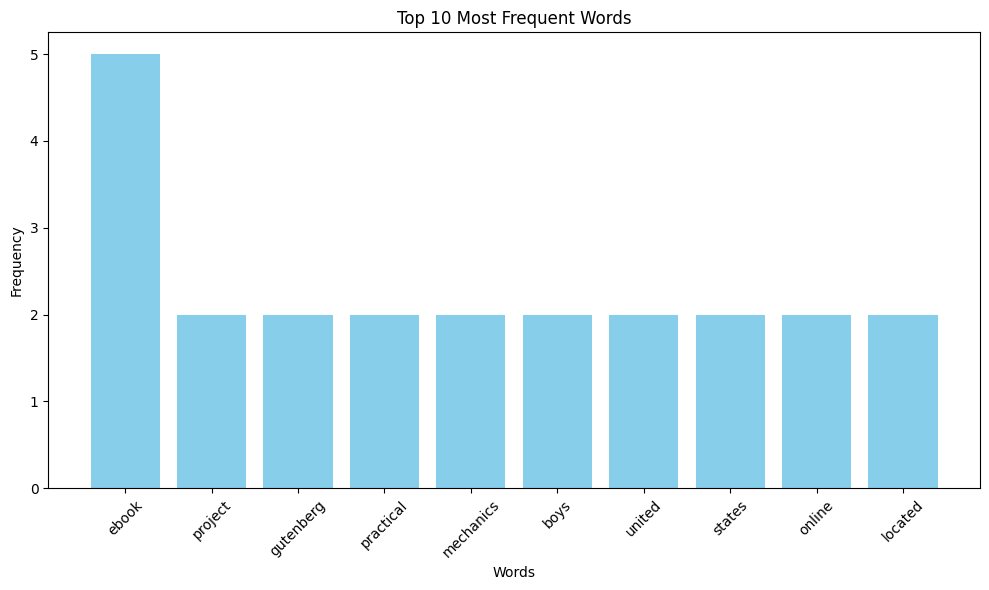

In [11]:
# TASK 5: Bonus - Bar Plot of Top 10 Words
import matplotlib.pyplot as plt

# Get top 10 most common words
top_10 = word_counts.most_common(10)
words, frequencies = zip(*top_10)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("top_words.png")

print("\nBar plot saved as top_words.png")
